# Benchmark C5

In [5]:
#[sto-3g]
pyscfsto3g = [ 2.3203752040863037, 2.4540200233459473, 2.7960593700408936, 2.773521661758423, 2.3798913955688477, 3.35335373878479, 3.09120774269104, 3.5306479930877686, 2.7441177368164062, 3.1171131134033203]
pyscfsto3g = [ 3.024941921234131, 3.0679218769073486, 2.873220205307007, 2.89328670501709, 2.811615228652954, 2.645721435546875, 2.8972432613372803, 2.7988944053649902, 2.8731987476348877, 3.0900607109069824]

#[6-31G]
pyscf631g = [ 3.6204071044921875, 4.921894073486328, 3.422499179840088, 2.960789918899536, 6.346081256866455, 3.7396273612976074, 3.216602325439453, 4.263293743133545, 3.118089437484741, 3.2952206134796143]
#[6-31G*]
pyscf631gs = [ 4.7417943477630615, 4.273261785507202, 4.341336488723755, 4.414957523345947, 6.352093935012817, 4.049818277359009, 4.460545778274536, 4.069921016693115, 5.789641857147217, 5.969973564147949]

2.856030797958374
2.8976104497909545


In [2]:
# getting there; r
import pandas as pd 

# TODO
# [ ] compare integrals seperately (might be easier?)

# NOTE 
# For 631g* integral code breaks when: 
# -intv 1 worked for -C {1,2,3} but not {4,5}  
# -intv 0 worked for -C 5
# The difference between intv {0,1} is for loop in tilejax/python. 
# Error: 
#[##################################################] 100% Compilation Finished [Elapsed: 00:00:35.8]
#./direct.sh: line 8: 3312421 Aborted                 (core dumped) XLA_IPU_PLATFORM_DEVICE_COUNT=1 POPLAR_ENGINE_OPTIONS="{\"autoReport.all\": \"true\", \"autoReport.directory\": \"/nethome/alexm/jaxdft-pre-experimental/electron_repulsion/profs/\"}" TF_POPLAR_FLAGS=--show_progress_bar=true taskset -c 0-14 python direct.py $@


# [sto3g, N=37]
# didn't run without Hs due to annoying tilejax error. 
#XLA_IPU_PLATFORM_DEVICE_COUNT=1 taskset -c 45-59 ./sto3gprof.sh density_functional_theory.py -gdb 5 -fname testc5sto3g -threads 3 -threads_int 6 -generate -save -backend ipu -float32 -level 0 -plevel 0 -its 20 -skip_minao -intv 1  -multv 2  -basis sto3g -choleskycpu -nohs
#cycles: 77.7M  (~42ms)
# integrals: 10M   (87%)
# scf: 59.7M
# show how much time is wasted just storing stuff in sliced array; there's no need for this, just didn't have time to fix it. 

cycles = [77.7, 108.7, 302.8]

# [631g, N=45] 
#XLA_IPU_PLATFORM_DEVICE_COUNT=1 taskset -c 45-59 ./631gprof.sh density_functional_theory.py -gdb 5 -fname testc5631gs  -threads 2 -threads_int 4 -generate -save -backend ipu -float32 -level 0 -plevel 0 -its 20 -skip_minao -intv 1  -multv 2  -basis 631g -choleskycpu -nohs
# cycles: 108,686,888 (~59ms)
# tile util: 46.3%
# int: 35M (v0) (32m v1)

# [631gs, N=70] running only intv{0}
#XLA_IPU_PLATFORM_DEVICE_COUNT=1 taskset -c 45-59 ./prof.sh density_functional_theory.py -gdb 5 -fname testc5631gs  -threads 2 -threads_int 2 -generate -save -backend ipu -float32 -level 0 -plevel 0 -its 20 -skip_minao -intv 0  -multv 2  -basis 6-31G* -choleskycpu -nohs
# cycle: 302,842,763 (~165ms)
# tile util: 60.5%
# integral: 91
# scf: 215
# (correct results with threads=1 but somethings wrkind of kbroken with threads=2)
#TF_POPLAR_FLAGS=--executable_cache_path="_cache/" XLA_IPU_PLATFORM_DEVICE_COUNT=1 taskset -c 60-74 python density_functional_theory.py -gdb 5 -fname test_631gs_benchmark_  -threads 2 -threads_int 2 -generate -save -backend ipu -float32 -level 0 -plevel 0 -its 20 -skip_minao -intv 0  -multv 0  -basis 6-31G* -choleskycpu -nohs

#XLA_IPU_PLATFORM_DEVICE_COUNT=1 taskset -c 45-59 ./prof.sh density_functional_theory.py -gdb 5 -fname testc5631gs  -threads 1 -threads_int 1 -generate -save -backend ipu -float32 -level 0 -plevel 0 -its 20 -skip_minao -intv 0  -multv 2  -basis 6-31G* -choleskycpu -nohs
# cycle: 418,752,497 (~229ms)
# integral: 165
# scf: 253


# generate 10M {sto3g, 631g, 631g*} dataset for -C 5 
sto3g = pd.read_csv("data/generated/testc5sto3g/10_GDB5_f32True_grid0_backendipu_62_123/data.csv", compression="gzip")
_631g= pd.read_csv("data/generated/_testc5631gs/0_GDB5_f32True_grid0_backendipu_62_123/data.csv", compression="gzip")
_631gs= pd.read_csv("data/generated/test_631gs_benchmark_/0_GDB5_f32True_grid0_backendipu_62_123/data.csv", compression="gzip")

In [3]:
sto3g["atoms"], _631g["atoms"], _631gs["atoms"]

(0        CCCCCHHHHHHHHHHHH
 1        CCCCCHHHHHHHHHHHH
 2        CCCCCHHHHHHHHHHHH
 3        CCCCCHHHHHHHHHHHH
 4        CCCCCHHHHHHHHHHHH
                ...        
 40144    CCCCCHHHHHHHHHHHH
 40145    CCCCCHHHHHHHHHHHH
 40146    CCCCCHHHHHHHHHHHH
 40147    CCCCCHHHHHHHHHHHH
 40148    CCCCCHHHHHHHHHHHH
 Name: atoms, Length: 40149, dtype: object,
 0        CCCCC
 1        CCCCC
 2        CCCCC
 3        CCCCC
 4        CCCCC
          ...  
 29536    CCCCC
 29537    CCCCC
 29538    CCCCC
 29539    CCCCC
 29540    CCCCC
 Name: atoms, Length: 29541, dtype: object,
 0      CCCCC
 1      CCCCC
 2      CCCCC
 3      CCCCC
 4      CCCCC
        ...  
 278    CCCCC
 279    CCCCC
 280    CCCCC
 281    CCCCC
 282    CCCCC
 Name: atoms, Length: 283, dtype: object)

2.8976104497909545 0.15584199999999998 18.593257592888662
3.8904505014419555 0.16959599999999997 22.939518039587938
4.846334457397461 0.21445400000000003 22.598480128127523
[77.7, 108.7, 302.8]
[0.04257534 0.05956164 0.16591781]


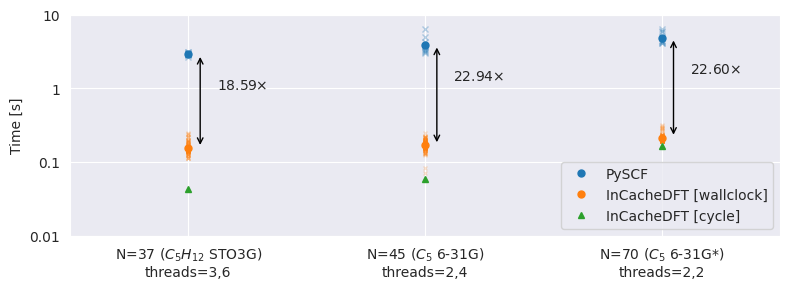

In [4]:
import numpy as np
import seaborn as sns 
sns.set_style("darkgrid")

# try mean and median

time_sto3g =  np.sum(np.stack(sto3g["times"][1:101].apply(lambda x: np.fromstring(x[1:-1], sep=" ", dtype=np.float64)).values), axis=1)/1000
time_631g  =  np.sum(np.stack(_631g["times"][1:101].apply(lambda x: np.fromstring(x[1:-1], sep=" ", dtype=np.float64)).values), axis=1)/1000
time_631gs =  np.sum(np.stack(_631gs["times"][1:101].apply(lambda x: np.fromstring(x[1:-1], sep=" ", dtype=np.float64)).values), axis=1)/1000
def reduce(x): return np.mean(x)

import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,1, figsize=(8, 3))

plt.plot(np.ones(10), pyscfsto3g, 'C0x', ms=5, alpha=0.3)
plt.plot(np.ones(1), reduce(pyscfsto3g), 'C0o', ms=5, label="PySCF")

plt.plot(np.ones(10)+1, pyscf631g, 'C0x', ms=5, alpha=0.3)
plt.plot(np.ones(1)+1, reduce(pyscf631g), 'C0o', ms=5)

plt.plot(np.ones(10)+2, pyscf631gs, 'C0x', ms=5, alpha=0.3)
plt.plot(np.ones(1)+2, reduce(pyscf631gs), 'C0o', ms=5)

#plt.plot([0, 4], [reduce(pyscfsto3g), reduce(pyscfsto3g)], "k--", alpha=0.2, lw=1)
#plt.plot([0, 4], [reduce(pyscf631g), reduce(pyscf631g)], "k--", alpha=0.2, lw=1)
#plt.plot([0, 4], [reduce(pyscf631gs), reduce(pyscf631gs)], "k--", alpha=0.2, lw=1)

#plt.plot([0, 4], [reduce(time_sto3g), reduce(time_sto3g)], "k--", alpha=0.2, lw=1)
#plt.plot([0, 4], [reduce(time_631g), reduce(time_631g)], "k--", alpha=0.2, lw=1)
#plt.plot([0, 4], [reduce(time_631gs), reduce(time_631gs)], "k--", alpha=0.2, lw=1)


plt.annotate( '', xy=(1.05, reduce(time_sto3g)),xytext=(1.05, reduce(pyscfsto3g)) , arrowprops=dict(arrowstyle='<->',lw=1, color="black"), color="b")
plt.text(1.12, reduce(pyscfsto3g)/3, "%.2f$\\times$"% (reduce(pyscfsto3g) / reduce(time_sto3g) ))


plt.annotate( '', xy=(2.05, reduce(time_631g)),xytext=(2.05, reduce(pyscf631g)) , arrowprops=dict(arrowstyle='<->',lw=1, color="black"), color="b")
plt.text(2.12, reduce(pyscf631g)/3, "%.2f$\\times$"%( reduce(pyscf631g) / reduce(time_631g) ))


plt.annotate( '', xy=(3.05, reduce(time_631gs)),xytext=(3.05, reduce(pyscf631gs)) , arrowprops=dict(arrowstyle='<->',lw=1, color="black"), color="b")
plt.text(3.12, reduce(pyscf631gs)/3, "%.2f$\\times$"%( reduce(pyscf631gs) / reduce(time_631gs) ))


print(reduce(pyscfsto3g), reduce(time_sto3g), reduce(pyscfsto3g) / reduce(time_sto3g))
print(reduce(pyscf631g), reduce(time_631g), reduce(pyscf631g) / reduce(time_631g))
print(reduce(pyscf631gs), reduce(time_631gs), reduce(pyscf631gs) / reduce(time_631gs))

plt.plot(np.ones(time_sto3g.shape), time_sto3g, 'C1x', ms=3, alpha=0.2)
plt.plot(np.ones(1), reduce(time_sto3g), 'C1o', ms=5, label="InCacheDFT [wallclock]")
plt.plot(np.ones(time_sto3g.shape)+1, time_631g, 'C1x', ms=3, alpha=0.2)
plt.plot(np.ones(1)+1, reduce(time_631g), 'C1o', ms=5)
plt.plot(np.ones(time_sto3g.shape)+2, time_631gs, 'C1x', ms=3, alpha=0.2)
plt.plot(np.ones(1)+2, reduce(time_631gs), 'C1o', ms=5)

print(cycles)
cycle_ms_estimate = np.array(cycles) / 1.825 # million cycles to seconds 
cycle_s_estimate = np.array(cycle_ms_estimate) / 1000 
print(cycle_s_estimate)

# the 1 threads 6-31g* passes test case with -intv 0 and -multv 0 but fails with threads=2

plt.plot(np.ones(1), cycle_s_estimate[0], "C2^", ms=5, label="InCacheDFT [cycle]")
plt.plot(np.ones(1)+1, cycle_s_estimate[1], "C2^", ms=5)
plt.plot(np.ones(1)+2, cycle_s_estimate[2], "C2^", ms=5)

plt.yscale("log")
plt.yticks([ 0.01, 0.1, 1, 10], [ 0.01, 0.1, 1, 10])
plt.xticks([1, 2, 3], ["N=37 ($C_5H_{12}$ STO3G)\nthreads=3,6", "N=45 ($C_5$ 6-31G)\nthreads=2,4", "N=70 ($C_5$ 6-31G*)\nthreads=2,2"])
plt.xlim([0.5, 3.5])
plt.ylim([0.01, 10])
plt.legend()
plt.ylabel("Time [s]")

plt.tight_layout()

# redo time for pyscf, add the hydrogens for sto3g case!
# try s1, s4 and s8

# claim: 20x aster than CPU implementation 
# but: conditions on claim, needs to fit SRAM 


# characterize the conditions in which we expect to see 10x improvement


# how many gaussians : number of basis sfunctions  ;; 
# size of the matrices  : N

# larger N = 100
# - use 16 IPUs adn split the computational graph over them 
# - recompute stuff and don't store in memory 
#     stuff could be BBM, atomic orbitals evaluated on the [num_points,3 tupple of points];;     [4, num_points, N]
# - when N gets much larger, big_bad_matrix scales O(N^2) by zeroing out E_ijkl <= 1e-10.    ;; 20-30 atoms 

# and forces 
# 
# recompile for every N 
#
# take the remainiig CPU stuff put it on IPU  (increases memory pressure)


# 1. we need to not go OOM 
#     N <= 100 (perhaps odd will cause problems)
#     

# 2. one recompile for every N
#  

# Emphasize that this is the size of the matrices not basis functions!.
# maybe use n_bf for number of basis functions 

# N: number of molecular orbitals (size of the matrices)
# n_e:  electrons 
# n_bf: basis functions 

# n_bf <= N
# N <= n_bf * max_angular_momentum            # 5;    libcint 17    ; 631g* {CNOF} 


In [ ]:
!ls *.parquet

# Numerical Error XC

In [2]:
import pandas as pd 
import numpy as np 
a = np.load("exchange_correlation/b3lyp.npy.npz")

In [3]:
[b for b in a.keys()]

['e_xc', 'v_xc_rho', 'v_xc_norm', 'rho', 'pyscf_e_xc', 'pyscf_v_xc_rho']

In [4]:
rho = a["rho"]
e_xc = a["e_xc"]
v_xc_rho = a["v_xc_rho"]
v_xc_norm = a["v_xc_norm"]

pyscf_e_xc = a["pyscf_e_xc"]
pyscf_v_xc_rho = a["pyscf_v_xc_rho"][0]
pyscf_v_xc_norm = a["pyscf_v_xc_rho"][1]
print(rho.shape, e_xc.shape, v_xc_rho.shape, v_xc_norm.shape, pyscf_e_xc.shape, pyscf_v_xc_rho.shape)

(4, 16614) (16614,) (16614,) (16614,) (16614,) (16614,)


In [10]:
import wandb

#qm9 equilibrium;; 3
# 1. fix molecules trained on to be exactly the same 
# 2. fix validation set to be exactly the sam

# schnet-oc-gdb100m
# 1. extrapolate to other number of atoms 

# does more data improve
# 1 zero shot interpolate qm9sto3g. 

# for all of them; do we want to run three times?

#gdb10-120000000-ethereal-morning-41
#gdb10-100000000-sweet-water-16
api = wandb.Api()

paths = ["alexmath/schnet-baseline/03fwkcxf",
      "alexmath/schnet-baseline/7ytb8jw4",
      "alexmath/schnet-baseline/fawetp5u",
      "alexmath/schnet-oc-gdb100m/c6bdxy28",
      "alexmath/schnet-oc-gdb100m/una3w3dp",
      "alexmath/schnet-oc-gdb100m/t8d17u6n",
      "alexmath/schnet-oc-gdb100m/241h1dhz",
      "alexmath/schnet-oc-gdb100m/zlzpgh0p",
      "alexmath/schnet-oc-gdb100m/2yv8z187",
      "alexmath/schnet-oc-gdb100m/hwopufbj"]
for s in paths: 
  run = api.run(s)
  # save the metrics for the run to a csv file
  metrics_dataframe = run.history()
  metrics_dataframe.to_csv("wandbfiles/%s.csv"%s)

In [9]:
!mkdir wandbfiles/alexmath/schnet-oc-gdb100m

In [24]:
smiles = [a for a in open("gdb/gdb11_size10_sorted.csv", "r").read().split("\n")]

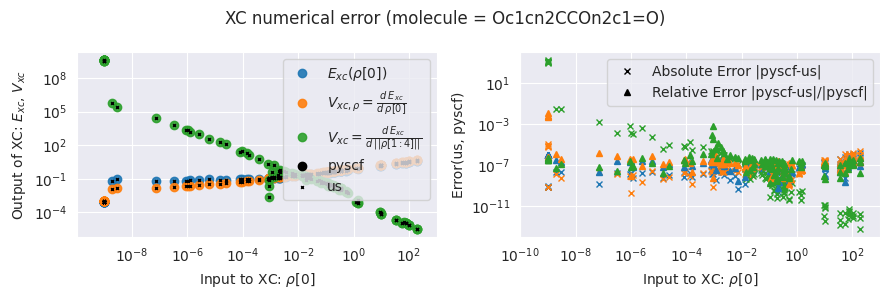

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2, figsize=(9, 3))

freq = 128
label1 = label="$E_{xc}(\\rho[0])$"
label2 = "$V_{xc,\\rho}=\\frac{d\\; E_{xc}}{d \\;\\rho[0]}$ "
label3 = "$V_{xc}=\\frac{d \\;E_{xc}}{d \\;||\\rho[1:4]||}$ "
ax[0].plot(np.abs(rho[0])[::freq], np.abs(pyscf_e_xc)[::freq], 'C0o', alpha=0.9, label=label1) 
ax[0].plot(np.abs(rho[0])[::freq], np.abs(pyscf_v_xc_rho)[::freq], 'C1o', alpha=0.9, label=label2)
ax[0].plot(np.abs(rho[0])[::freq], np.abs(pyscf_v_xc_norm)[::freq], 'C2o',  alpha=0.9, label=label3)


ax[0].plot(0,0, 'ko', label="pyscf")
ax[0].plot(np.abs(rho[0])[::freq], np.abs(v_xc_rho)[::freq], 'kx', label="us", ms=2)
ax[0].plot(np.abs(rho[0])[::freq], np.abs(e_xc)[::freq], 'kx', ms=2)
ax[0].plot(np.abs(rho[0])[::freq], np.abs(v_xc_norm)[::freq], 'kx', ms=2) 
ax[0].legend(loc=1)


ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_xticks([10**i for i in range(-8, 5, 2)])
ax[0].set_xlabel("Input to XC: $\\rho[0]$")
ax[0].set_ylabel("Output of XC: $E_{xc}$, $V_{xc}$")

ms = 4

ax[1].plot(0, 0, "kx", label="Absolute Error |pyscf-us|", ms=ms)
ax[1].plot(0, 0, "k^", label="Relative Error |pyscf-us|/|pyscf|", ms=ms)
ax[1].plot(np.abs(rho[0])[::freq], (np.abs(pyscf_e_xc-  e_xc))[::freq], 'C0x', ms=ms)
ax[1].plot(np.abs(rho[0])[::freq], (np.abs(pyscf_v_xc_rho - v_xc_rho))[::freq], 'C1x', ms=ms)
ax[1].plot(np.abs(rho[0])[::freq], (np.abs(pyscf_v_xc_norm - v_xc_norm))[::freq], 'C2x', ms=ms)

ax[1].plot(np.abs(rho[0])[::freq], (np.abs(pyscf_e_xc-  e_xc)/np.abs(pyscf_e_xc))[::freq], 'C0^', ms=ms)
ax[1].plot(np.abs(rho[0])[::freq], (np.abs(pyscf_v_xc_rho - v_xc_rho)/np.abs(pyscf_v_xc_rho))[::freq], 'C1^', ms=ms)
ax[1].plot(np.abs(rho[0])[::freq], (np.abs(pyscf_v_xc_norm - v_xc_norm)/np.abs(pyscf_v_xc_norm))[::freq], 'C2^', ms=ms) 
ax[1].set_xlabel("Input to XC: $\\rho[0]$")
ax[1].set_ylabel("Error(us, pyscf)")

plt.suptitle("XC numerical error (molecule = Oc1cn2CCOn2c1=O)")

ax[0].set_xlim([1e-10, 1e3])
ax[1].set_xlim([1e-10, 1e3])

ax[1].legend()

ax[1].set_yscale("log")
ax[1].set_xscale("log")
plt.tight_layout()

plt.savefig("figures/b3lyp.jpg")
#ax[0].legend(loc="upper center", bbox_to_anchor=(1.02, 1))

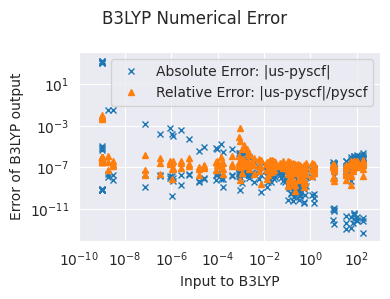

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,1, figsize=(4, 3))

freq = 128
label1 = label="$E_{xc}(\\rho[0])$"
label2 = "$V_{xc,\\rho}=\\frac{d\\; E_{xc}}{d \\;\\rho[0]}$ "
label3 = "$V_{xc}=\\frac{d \\;E_{xc}}{d \\;||\\rho[1:4]||}$ "

ms = 4

ax.plot(np.abs(rho[0])[::freq], (np.abs(pyscf_e_xc-  e_xc))[::freq], 'C0x', ms=ms, label="Absolute Error: |us-pyscf|")
ax.plot(np.abs(rho[0])[::freq], (np.abs(pyscf_v_xc_rho - v_xc_rho))[::freq], 'C0x', ms=ms)
ax.plot(np.abs(rho[0])[::freq], (np.abs(pyscf_v_xc_norm - v_xc_norm))[::freq], 'C0x', ms=ms)

ax.plot(np.abs(rho[0])[::freq], (np.abs(pyscf_e_xc-  e_xc)/np.abs(pyscf_e_xc))[::freq], 'C1^', ms=ms, label="Relative Error: |us-pyscf|/pyscf")
ax.plot(np.abs(rho[0])[::freq], (np.abs(pyscf_v_xc_rho - v_xc_rho)/np.abs(pyscf_v_xc_rho))[::freq], 'C1^', ms=ms)
ax.plot(np.abs(rho[0])[::freq], (np.abs(pyscf_v_xc_norm - v_xc_norm)/np.abs(pyscf_v_xc_norm))[::freq], 'C1^', ms=ms) 
ax.set_xlabel("Input to B3LYP")
ax.set_ylabel("Error of B3LYP output")

plt.suptitle("B3LYP Numerical Error")

ax.set_xlim([1e-10, 1e3])
ax.set_xlim([1e-10, 1e3])

ax.legend()

ax.set_yscale("log")
ax.set_xscale("log")
plt.tight_layout()
plt.savefig("figures/b3lyp.jpg")
#ax[0].legend(loc="upper center", bbox_to_anchor=(1.02, 1))

In [16]:
import numpy as np 
a = np.load("electron_repulsion/eri.npz")
print([b for b in a.keys()])

['ipu_vj', 'ipu_vk', 'vj', 'vk']


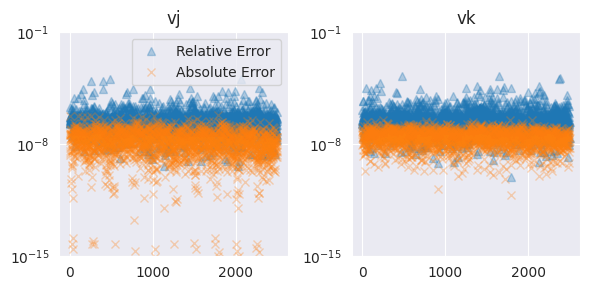

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(6,3))
vj = a["vj"].reshape(-1)
vk = a["vk"].reshape(-1)
ipu_vj = a["ipu_vj"].reshape(-1)
ipu_vk = a["ipu_vk"].reshape(-1)

ax[0].plot(np.abs(vj-ipu_vj)/np.abs(vj), '^', label="Relative Error", alpha=0.3)
ax[0].plot(np.abs(vj-ipu_vj), 'x', label="Absolute Error", alpha=0.3)

ax[1].plot(np.abs(vk-ipu_vk)/np.abs(vk), '^', label="vj relative", alpha=0.3)
ax[1].plot(np.abs(vk-ipu_vk), 'x', label="vj absolute", alpha=0.3)
ax[0].set_title("vj")

ax[0].legend()
#ax[1].legend()

ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[1].set_title("vk")

ax[0].set_ylim([1e-15,1e-1])
ax[1].set_ylim([1e-15,1e-1])


ax[0].set_yticks([1e-15,1e-8,1e-1])
ax[1].set_yticks([1e-15,1e-8,1e-1])

plt.tight_layout()
plt.savefig("figures/eri.jpg")

# Analyze Datasets

In [78]:
# atom positions are in bohr! 
# we do locs from rdkit which use angstrom and then cast to bohr due to pyscf. 
import pandas as pd 
import os 
files = [a for a in os.listdir("vals/") if "9" in a]
print(files)

# Only take the ones with exactly 9 atoms! 
qm9      = pd.read_parquet("vals/_qm9_rdkit_sto3g_train.parquet")
qm9rdkit = pd.read_parquet("vals/_qm9_sto3g_train.parquet")
gdb9     = pd.read_parquet("vals/test_gdb9.parquet")
print(qm9.shape, qm9rdkit.shape, gdb9.shape)

['_qm9_rdkit_sto3g_train.parquet', 'test_gdb9.parquet', '_qm9_sto3g_test.parquet', '_qm9_sto3g_train.parquet', 'qm9_rdkit_sto3g_train.parquet', '_qm9_rdkit_sto3g_test.parquet', 'qm9_sto3g.parquet']
(90477, 3) (100000, 3) (470960, 3)


In [117]:

from tqdm.notebook import tqdm 
tqdm.pandas() 
def addnums(df): 
  df["num_atoms"] = df["z"].progress_apply(lambda x: np.array((len([a for a in x]), 
                                           len([a for a in x if a == 1]),
                                           len([a for a in x if a == 6]),
                                           len([a for a in x if a == 7]),
                                           len([a for a in x if a == 8]),
                                           len([a for a in x if a == 9]))).reshape(1, -1)
                                           )
  return df 


# so we convert the qm9 to bohr (everything in our dft outputs bohr) 
qm9 = addnums(qm9)
qm9rdkit = addnums(qm9rdkit)
gdb9 = addnums(gdb9)

# difference in the distribution of atoms? 

  0%|          | 0/90477 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/470960 [00:00<?, ?it/s]

In [123]:
a = np.concatenate(qm9["num_atoms"], axis=0)
b = np.concatenate(qm9rdkit["num_atoms"], axis=0)
c = np.concatenate(gdb9["num_atoms"], axis=0)

In [132]:
np.max(c[:, 1])
#

4

In [160]:
# make new version with at most 4 hydrogens (and exactly 9 atoms)
_qm9 = qm9[np.logical_and( a[:, 1] <= 4, a[:, 0] - a[:, 1] == 9)] #
_qm9rdkit = qm9rdkit[np.logical_and( b[:, 1] <= 4, b[:, 0] - b[:, 1] == 9)] #


In [163]:
_qm9

,z,pos,y
32,"[6, 6, 7, 7, 6, 7, 7, 6, 8, 1, 1, 1, 1]","[-4.676068, -0.17746376, -0.019625846, -1.8711...",5.669025
60,"[8, 6, 6, 6, 8, 7, 6, 6, 6, 1, 1, 1]","[-0.9261119, 2.8680782, 4.318713, -0.1881421, ...",3.983664
83,"[8, 6, 6, 7, 6, 6, 6, 7, 7, 1, 1, 1]","[-4.7440505, 0.2480094, 0.025679812, -3.154036...",3.643380
92,"[6, 6, 7, 6, 7, 8, 7, 8, 8, 1, 1, 1]","[-4.3480177, 0.39439008, -0.11842598, -1.63612...",3.678671
125,"[8, 6, 7, 6, 8, 7, 6, 7, 7, 1, 1, 1, 1]","[5.106732, -1.2695063, 0.3851439, 2.652582, -0...",4.439874
...,...,...,...
90357,"[6, 6, 6, 6, 7, 6, 7, 6, 7, 1, 1, 1]","[-5.9146457, -0.22020994, 1.5751994, -3.621194...",5.803601
90395,"[7, 6, 8, 7, 7, 6, 7, 6, 8, 1, 1, 1, 1]","[4.515204, 0.34586763, 0.4211758, 2.3036425, -...",5.180071
90420,"[8, 6, 6, 8, 6, 6, 7, 6, 8, 1, 1, 1]","[-3.124635, -3.3827052, 0.91651535, -3.146505,...",5.235044
90437,"[8, 6, 6, 8, 6, 6, 7, 6, 7, 1, 1, 1, 1]","[-4.3898787, 2.4679034, -0.8559664, -4.482593,...",3.613439


In [162]:
_qm9 = _qm9[["z", "pos", "y"]]
_qm9rdkit = _qm9rdkit[["z", "pos", "y"]]
_qm9.to_parquet("vals/qm9_sto3g_fixedh.parquet")
_qm9rdkit.to_parquet("vals/qm9_rdkit_sto3g_fixedh.parquet")

(array([ 34., 136., 338., 414., 421., 489., 424., 326., 218., 115.,  64.,
         35.,  10.,   5.,   1.,   4.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([ 3.17589402,  3.57718968,  3.97848535,  4.37978077,  4.78107643,
         5.18237209,  5.58366776,  5.98496342,  6.38625908,  6.78755474,
         7.1888504 ,  7.59014559,  7.99144125,  8.39273739,  8.79403305,
         9.19532776,  9.59662342,  9.99791908, 10.39921474, 10.80051041,
        11.20180607, 11.60310173, 12.00439739, 12.40569305, 12.80698872,
        13.20828438]),
 <BarContainer object of 25 artists>)

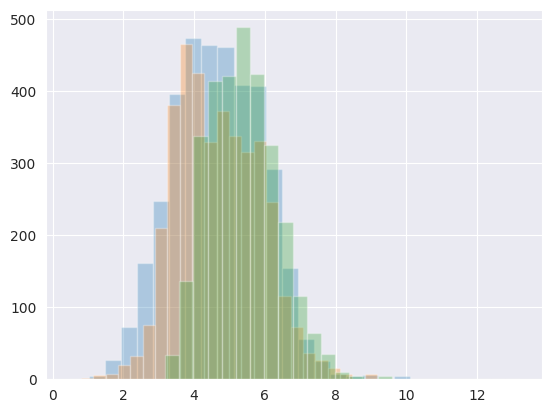

In [179]:
plt.hist(gdb9["y"][::128], alpha=0.3, bins=25)
plt.hist(pd.read_parquet("vals/qm9_sto3g_fixedh.parquet")["y"], bins=25, alpha=0.3) # equilibrium
plt.hist(pd.read_parquet("vals/qm9_rdkit_sto3g_fixedh.parquet")["y"], bins=25, alpha=0.3) # off-equilibrium 

In [154]:
np.max( _qm9rdkit["num_Hs"] )

5

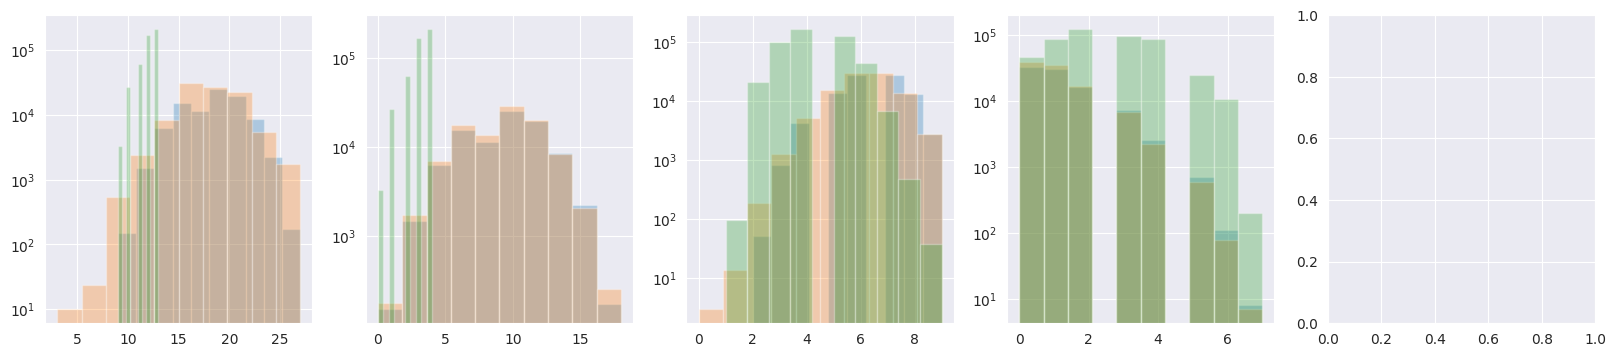

In [156]:
fig, ax = plt.subplots(1,5, figsize=(20, 4))
for i in range(4): 
  ax[i].hist(a[:, i], bins=10, alpha=0.3)
  ax[i].hist(b[:, i], bins=10, alpha=0.3)
  ax[i].hist(c[:, i], bins=10, alpha=0.3)
  ax[i].set_yscale("log")

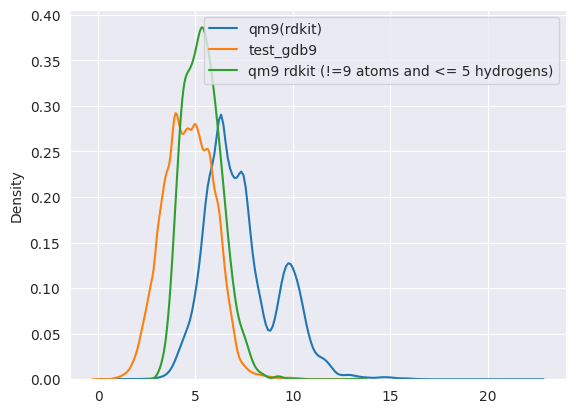

In [171]:
# Quite a distribution shift; looks like caused simply by atom_num sometimes different to 9 and number of atoms from 0-20 instead of 0-5 
import seaborn as sns
sns.kdeplot(qm9rdkit["y"].values, label="qm9(rdkit)")
sns.kdeplot(gdb9["y"].values, label="test_gdb9")
sns.kdeplot(_qm9rdkit["y"].values, label="qm9 rdkit (!=9 atoms and <= 5 hydrogens)")
plt.legend()

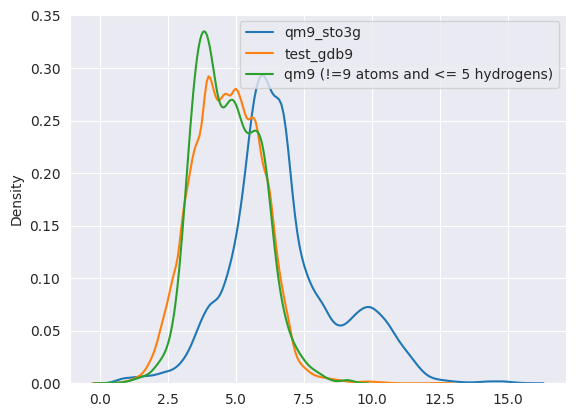

In [158]:
# Quite a distribution shift; looks like caused simply by atom_num sometimes different to 9 and number of atoms from 0-20 instead of 0-5 
import seaborn as sns
sns.kdeplot(qm9["y"].values, label="qm9_sto3g")
sns.kdeplot(gdb9["y"].values, label="test_gdb9")
sns.kdeplot(_qm9["y"].values, label="qm9 (!=9 atoms and <= 5 hydrogens)")
plt.legend()

In [115]:
qm9["num_atoms"]

0         (16, 7, 5, 3, 1, 0)
1         (18, 9, 5, 3, 1, 0)
2        (25, 16, 8, 0, 1, 0)
3        (23, 14, 9, 0, 0, 0)
4        (19, 10, 7, 0, 2, 0)
                 ...         
90472    (19, 10, 5, 2, 2, 0)
90473    (19, 10, 8, 0, 1, 0)
90474     (15, 6, 6, 0, 3, 0)
90475    (19, 10, 7, 0, 2, 0)
90476     (14, 5, 4, 5, 0, 0)
Name: num_atoms, Length: 90477, dtype: object

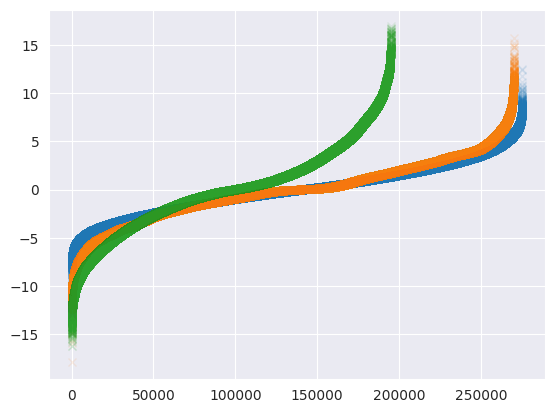

In [111]:
plt.plot(np.sort(np.concatenate(qm9["pos"].values[:5000:])), 'x', alpha=0.1)
plt.plot(np.sort(np.concatenate(qm9rdkit["pos"].values[:5000:])), 'x', alpha=0.1)
plt.plot(np.sort(np.concatenate(gdb9["pos"].values[:5000:]))*1.88973, 'x', alpha=0.1)

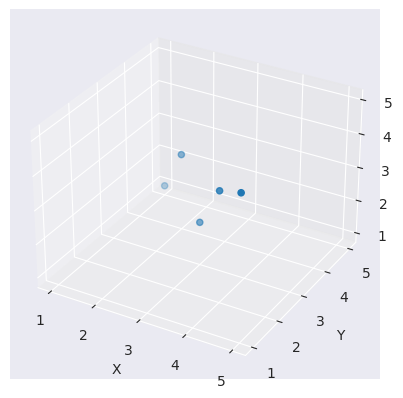

In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate some example data

# Plot the points in 3D
ax.scatter(x, y, z)

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.show()

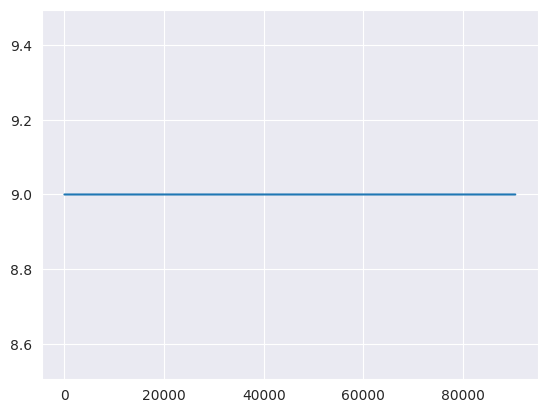

In [75]:
plt.plot(sizes.values)

# Numerical error (hlgap, energy) for QM10' 

In [6]:
# this may take ~ 20M 
import pandas as pd 
df = pd.read_parquet("bigrun13.parquet") # ~ 200GB

In [7]:
pyscf = df[df["pyscf_hlgap"] != 0.]
pyscf.to_parquet("bigrun13_pyscf.parquet") # save the 10k subset 

In [8]:
pyscf

,Unnamed: 0,smile,atoms,atom_positions,energies,std,pyscf_energies,pyscf_hlgap,pyscf_homo,pyscf_lumo,times,homo,lumo,hlgap,N,basis
2902,0,FCc1coc2[nH]nnc12,FCCCOCNNNCHHHH,"[-4.854678591701317, -2.029387474817043, 1.888...","[-13801.997249989327, -13699.855521655581, -13...",0.000480,"[-14277.33878112079, -14273.35227012925, -1428...",6.618703,-4.577748,2.040955,[2.85000e+01 1.00000e-01 1.00000e-01 2.00000e-...,-4.577826,2.040798,6.618624,54,sto3g
4151,0,ON=C1NN=C(C#N)C1=C,ONCNNCCNCCHHHH,"[-5.942506839264121, 0.9133355730454396, -0.15...","[-12267.841135201856, -12153.549366128505, -12...",0.000693,"[-13068.779658912126, -13051.559743210984, -13...",4.006950,-3.706536,0.300414,[2.80000e+00 0.00000e+00 1.00000e-01 1.00000e-...,-3.706608,0.300407,4.007015,54,sto3g
9895,0,OC1C(=O)Nc2nocc12,OCCONCNOCCHHHH,"[-2.5352419545579385, -2.7963575301942503, 1.3...","[-14147.064564033943, -14101.156744188875, -14...",0.000971,"[-14163.085420140987, -14113.400207318547, -14...",5.808978,-3.756035,2.052943,[4.10000e+00 0.00000e+00 1.00000e-01 1.00000e-...,-3.756145,2.052751,5.808896,54,sto3g
12892,0,FC1C(=N)Nc2nocc12,FCCNNCNOCCHHHH,"[1.2017899375055234, -3.473256502250478, 1.732...","[-14276.184805512366, -14271.889178939593, -14...",0.000816,"[-14276.437376885655, -14264.141376552368, -14...",6.324680,-4.182426,2.142254,[3.20000e+00 0.00000e+00 1.00000e-01 2.00000e-...,-4.182506,2.142189,6.324694,54,sto3g
14141,0,O1C=COc2nnccc12,OCCOCNNCCCHHHH,"[-1.6487738811521921, 2.2963955245034686, -0.4...","[-13177.83609175252, -13177.782206545384, -131...",0.000576,"[-13174.259631457797, -13169.953159603927, -13...",4.504604,-3.407684,1.096919,[2.90000e+00 0.00000e+00 1.00000e-01 2.00000e-...,-3.407955,1.096771,4.504726,54,sto3g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207971,0,NCc1c2NCc2nn1O,NCCCNCCNNOHHHHHHHH,"[5.234521639487432, -0.26775831405553957, 0.04...","[-12545.504606182858, -11910.235586556728, -12...",0.001396,"[-13132.3646383838, -13130.396349852743, -1313...",5.930766,-2.387472,3.543293,[2.80000e+00 0.00000e+00 0.00000e+00 1.00000e-...,-2.387611,3.542946,5.930557,58,sto3g
216457,0,OCC1OC(=C)C(O)C1=O,OCCOCCCOCOHHHHHHHH,"[-4.25961644273347, 2.0706347062291752, 0.2050...","[-13741.040437428002, -13395.317267021395, -14...",0.000429,"[-14329.481323895288, -14313.265203536763, -14...",5.061302,-3.330628,1.730674,[2.40000e+00 0.00000e+00 0.00000e+00 1.00000e-...,-3.330842,1.730393,5.061235,58,sto3g
217892,0,OCc1c2NCc2cn1O,OCCCNCCCNOHHHHHHHH,"[5.519670661838571, -0.6570205305121933, 0.714...","[-12901.35894748721, -12119.484757434891, -129...",0.001633,"[-13234.52829345959, -13233.877593119922, -132...",6.143811,-2.223848,3.919963,[2.90000e+00 0.00000e+00 0.00000e+00 1.00000e-...,-2.223810,3.919953,6.143764,58,sto3g
230169,0,NN1C(=O)CC(CO)C1=O,NNCOCCCOCOHHHHHHHH,"[-5.652129611657564, 0.47964829741331233, 0.79...","[-13412.525172723621, -13647.279156633096, -14...",0.000965,"[-14225.52529309585, -14151.477254939837, -142...",5.364974,-3.247652,2.117322,[2.50000e+00 0.00000e+00 0.00000e+00 1.00000e-...,-3.248046,2.116928,5.364975,58,sto3g


In [3]:
import pandas as pd 
df= pd.read_parquet("bigrun631g.parquet")

In [6]:
pyscf = df[df["pyscf_hlgap"] != 0.]
pyscf.to_parquet("bigrun631g_pyscf.parquet")

In [2]:
import pandas as pd 
df = pd.read_parquet("big_gdb8_sto3g.parquet")

In [3]:
pyscf = df[df["pyscf_hlgap"] != 0.]

In [47]:
pyscf.to_parquet("big_gdb8_sto3g_pyscf.parquet")

NameError: name 'pyscf' is not defined

In [72]:
pyscf = pd.read_parquet("bigrun631g_pyscf.parquet")

In [19]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
sns.set_style("darkgrid")

def plot(pyscf):
  fig, ax = plt.subplots(1,2, figsize=(12, 2.1))

  std = pyscf["std"]
  conv = std<0.01

  e_us    = pyscf["energies"].apply(lambda x: np.mean(np.fromstring(x[1:-1], sep=",", dtype=np.float64)[-5:]))
  e_pyscf = pyscf["pyscf_energies"].apply(lambda x: np.fromstring(x[1:-1], sep=",", dtype=np.float64)[-1])
  error = np.abs(e_us.values - e_pyscf.values)
  rerror = np.abs(e_us.values - e_pyscf.values) / np.abs(e_pyscf.values)
  print(np.mean(error[conv]), np.median(error[conv]))
  ax[0].hist(np.log10(rerror[conv]), bins=25, edgecolor="none", label="Converged $\\frac{|ours-pyscf|}{|pyscf|}$", alpha=0.3, color="C1")
  ax[0].hist(np.log10(error[conv]), bins=25, edgecolor="none", label="Converged |ours-pyscf|", color="C0")

  mae = np.mean(np.abs(error[conv]))
  ax[0].plot([np.log10(mae), np.log10(mae)], [0, 10000], 'k', label="MAE", color="k")
  ax[0].plot(np.log10([0.04, 0.04]), [0, 10000], label="Chemical Accuracy", color="C2")
  ax[0].text(np.log10(mae), 2500, "MAE=%.5feV"%np.around(mae,7))
  ax[0].hist(np.log10(error[~conv]), bins=25, edgecolor="none", alpha=0.3, label="Not Converged |ours-pyscf| (less than 1\%)", color="red")
  ax[0].set_yscale("log")
  ax[0].set_ylabel("occurences")
  ax[0].set_xlabel("log$_{10}$(|energy_ours_float32 - energy_pyscf_float64)|) [eV]")

  error =  np.abs(pyscf["hlgap"].values - pyscf["pyscf_hlgap"].values)
  rerror =  np.abs(pyscf["hlgap"].values - pyscf["pyscf_hlgap"].values) / np.abs(pyscf["pyscf_hlgap"])
  print(np.mean(error[conv]), np.median(error[conv]))
  ax[1].hist(np.log10(rerror[conv]), bins=25, edgecolor="none", label="Converged $\\frac{|ours-pyscf|}{|pyscf|}$", alpha=0.3, color="C1")
  ax[1].hist(np.log10(error[conv]), bins=25, edgecolor="none", label="Converged |ours-pyscf|", color="C0")
  mae = np.mean(np.abs(error[conv]))
  ax[1].text(np.log10(mae),2500, "MAE=%.5feV"%np.around(mae,7))
  ax[1].plot([np.log10(mae), np.log10(mae)], [0, 1000000], 'k', label="MAE", color="k")
  ax[1].plot(np.log10([0.04, 0.04]), [0, 1000000], label="Chemical Accuracy", color="C2")

  ax[1].hist(np.log10(rerror[~conv]), bins=25, edgecolor="none", alpha=0.3, label="Not Converged |ours-pyscf| (less than 1%)", color="red")


  ax[1].set_yscale("log")
  ax[1].set_ylabel("occurences")
  ax[1].set_xlabel("log$_{10}$(|hlgap_ours_float32 - hlgap_pyscf_float64|) [eV]")
  ax[0].set_xlim([-9, 3])
  ax[1].set_xlim([-9, 3])
  ax[0].set_yticks([1,10,100,1000], [1,10,100,1000])
  ax[1].set_yticks([1,10,100,1000], [1,10,100,1000])
  #ax[0].legend()

  ax[0].set_ylim([0, 7000])
  ax[1].set_ylim([0, 7000])

pyscf_sto3g_gdb10 = pd.read_parquet("bigrun13_pyscf.parquet")
#pyscf_631g_gdb8 = pd.read_parquet("bigrun631g_pyscf.parquet")
#pyscf_sto3g_gdb8 = pd.read_parquet("big_gdb8_sto3g_pyscf.parquet")

#print(pyscf_sto3g_gdb10.shape)
#print(pyscf_631g_gdb8.shape)
#print(pyscf_sto3g_gdb8.shape) 


#plot(pyscf_631g_gdb8)
#plot(pyscf_sto3g_gdb8)
plot(pyscf_sto3g_gdb10)

plt.tight_layout(rect=(0,0,1,0.80), pad=0)
#plt.subplots_adjust(bottom=0)
plt.legend(loc='lower center', bbox_to_anchor=(-0.2, 0.97), ncol=5, fontsize="small")
plt.savefig("figures/numerical_error.png")

### Convergence plot using -check (fresh minao every iteration)

In [95]:
import os 
from natsort import natsorted 
cpu32s = natsorted([a for a in os.listdir("experiments/checkc/") if ".npz" in a and "cpu" in a and "False" in a])
cpu64s = natsorted([a for a in os.listdir("experiments/checkc/") if ".npz" in a and "cpu" in a and "True" in a])
ipus  = natsorted([a for a in os.listdir("experiments/checkc/") if ".npz" in a and "ipu" in a])
print(ipus)

['0_1_True_ipu_Oc1cn2CCOn2c1=O.npz', '0_2_True_ipu_Oc1cn2CCOn2c1=O.npz', '1_1_True_ipu_Nc1cn2OCOn2c1=N.npz', '1_2_True_ipu_Nc1cn2OCOn2c1=N.npz', '2_1_True_ipu_Cc1cn2OCOn2c1=O.npz', '2_2_True_ipu_Cc1cn2OCOn2c1=O.npz', '3_1_True_ipu_Fc1nn2CCCn2c1=O.npz', '3_2_True_ipu_Fc1nn2CCCn2c1=O.npz', '4_1_True_ipu_Fc1nn2CCNn2c1=N.npz', '4_2_True_ipu_Fc1nn2CCNn2c1=N.npz', '5_1_True_ipu_FC1C2NN=CC2C=C1F.npz', '5_2_True_ipu_FC1C2NN=CC2C=C1F.npz', '6_1_True_ipu_FC1C2N=CNC2C=C1F.npz', '6_2_True_ipu_FC1C2N=CNC2C=C1F.npz', '7_1_True_ipu_FC1C2OC=CC2C=C1F.npz', '7_2_True_ipu_FC1C2OC=CC2C=C1F.npz', '8_1_True_ipu_OC1C2ON=CC2C=C1F.npz', '8_2_True_ipu_OC1C2ON=CC2C=C1F.npz', '9_1_True_ipu_FC1C2CN=CN2C=C1F.npz', '9_2_True_ipu_FC1C2CN=CN2C=C1F.npz', '10_1_True_ipu_FC1=CC2C=NOC2C1=C.npz', '10_2_True_ipu_FC1=CC2C=NOC2C1=C.npz', '11_1_True_ipu_FC1=CC2C=CCN2C1=O.npz', '11_2_True_ipu_FC1=CC2C=CCN2C1=O.npz', '12_1_True_ipu_Fc1cn2C=CCn2c1=N.npz', '12_2_True_ipu_Fc1cn2C=CCn2c1=N.npz', '13_1_True_ipu_Oc1cn2C=CCn2c1=O.npz',

In [96]:
print(cpu32s)
print(ipus)
print(cpu64s)

['0_1_False_cpu_Oc1cn2CCOn2c1=O.npz', '0_2_False_cpu_Oc1cn2CCOn2c1=O.npz', '1_1_False_cpu_Nc1cn2OCOn2c1=N.npz', '1_2_False_cpu_Nc1cn2OCOn2c1=N.npz', '2_1_False_cpu_Cc1cn2OCOn2c1=O.npz', '2_2_False_cpu_Cc1cn2OCOn2c1=O.npz', '3_1_False_cpu_Fc1nn2CCCn2c1=O.npz', '3_2_False_cpu_Fc1nn2CCCn2c1=O.npz', '4_1_False_cpu_Fc1nn2CCNn2c1=N.npz', '4_2_False_cpu_Fc1nn2CCNn2c1=N.npz', '5_1_False_cpu_FC1C2NN=CC2C=C1F.npz', '5_2_False_cpu_FC1C2NN=CC2C=C1F.npz', '6_1_False_cpu_FC1C2N=CNC2C=C1F.npz', '6_2_False_cpu_FC1C2N=CNC2C=C1F.npz', '7_1_False_cpu_FC1C2OC=CC2C=C1F.npz', '7_2_False_cpu_FC1C2OC=CC2C=C1F.npz', '8_1_False_cpu_OC1C2ON=CC2C=C1F.npz', '8_2_False_cpu_OC1C2ON=CC2C=C1F.npz', '9_1_False_cpu_FC1C2CN=CN2C=C1F.npz', '9_2_False_cpu_FC1C2CN=CN2C=C1F.npz', '10_1_False_cpu_FC1=CC2C=NOC2C1=C.npz', '10_2_False_cpu_FC1=CC2C=NOC2C1=C.npz', '11_1_False_cpu_FC1=CC2C=CCN2C1=O.npz', '11_2_False_cpu_FC1=CC2C=CCN2C1=O.npz', '12_1_False_cpu_Fc1cn2C=CCn2c1=N.npz', '12_2_False_cpu_Fc1cn2C=CCn2c1=N.npz', '13_1_False

(['0_1_False_cpu.npz', '0_1_True_cpu.npz', '0_2_False_cpu.npz'], [])

195 89 42
19_2_False_cpu_Cc1cn2ccon2c1=O.npz 19_2_True_cpu_Cc1cn2ccon2c1=O.npz 19_2_True_ipu_Cc1cn2ccon2c1=O.npz


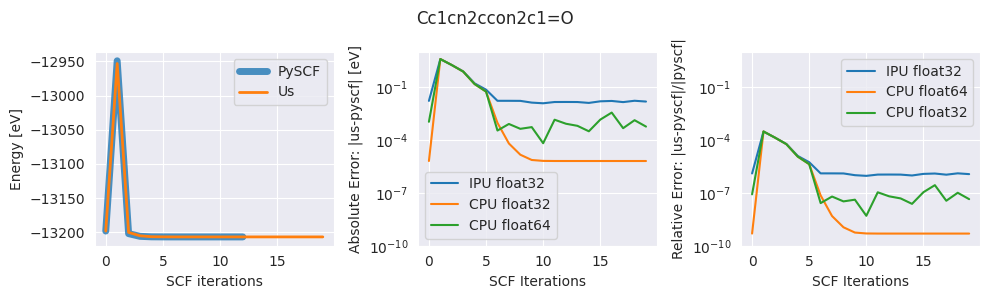

In [140]:
# earlier iterations have fewer hydrogens 
# looks like this leads to slightly larger numerical errors (~3-8x). 
import numpy as np 
import matplotlib.pyplot as plt 

#TF_POPLAR_FLAGS=--executable_cache_path="_cache/" python density_functional_theory.py -gdb 10  -generate -fname casdheckc  -save -level 0 -plevel 0 -float32 -backend ipu -num_conformers 3 -intv 1 -checkc
#TF_POPLAR_FLAGS=--executable_cache_path="_cache/" python density_functional_theory.py -gdb 10  -generate -fname casdheckc  -save -level 0 -plevel 0 -float32 -backend cpu -num_conformers 3 -intv 1 -checkc
#TF_POPLAR_FLAGS=--executable_cache_path="_cache/" python density_functional_theory.py -gdb 10  -generate -fname casdheckc  -save -level 0 -plevel 0  -backend cpu -num_conformers 3 -intv 1 -checkc

fig, ax = plt.subplots(1,3, figsize=(10,3))
print(len(ipus), len(cpu32s), len(cpu64s))

i = 37
#for i in [0,10,20,30,35]:
for i in [39]:
  c32 = cpu32s[i]
  c64 = cpu64s[i]
  i32 = ipus[i]
  print(c32, c64, i32)
  smile = i32.split(".")[0].split("_")[-1]
  hartree_to_eV    = 27.2114
  c32 = np.load("experiments/checkc/%s"%c32)
  c64 = np.load("experiments/checkc/%s"%c64)
  i32 = np.load("experiments/checkc/%s"%i32)

  e_c32 = c32["us"][:20]*hartree_to_eV
  e_c64 = c64["us"][:20]*hartree_to_eV
  e_i32 = i32["us"][:20]*hartree_to_eV

  e_pyscf = c32["pyscf"][:20]
  e_pyscf2 = i32["pyscf"][:20]
  e_pyscf3 = c64["pyscf"][:20]
  #print(np.max(np.abs(e_pyscf - e_pyscf2)))
  #print(np.max(np.abs(e_pyscf - e_pyscf3)))


  p = np.array(e_pyscf)
  p = np.concatenate((p, np.ones(20-p.shape[0])*p[-1]))

  #ax[0].plot(e_c32,  label="mol %i us"%i, lw=4)
  #ax[0].plot(e_c64,  label="mol %i us"%i, lw=3)
  ax[0].plot(e_pyscf,  '-', label="PySCF", lw=5, alpha=0.8)
  ax[0].plot(e_i32,    '-', label="Us", lw=2)
  ax[0].set_ylabel("Energy [eV]")
  ax[0].set_xlabel("SCF iterations")
  ax[0].legend()

  ax[1].plot(np.abs(e_i32-p), label="IPU float32")
  ax[1].plot(np.abs(e_c32-p), label="CPU float32")
  ax[1].plot(np.abs(e_c64-p), label="CPU float64")
  ax[1].set_yscale("log")
  ax[1].set_xlabel("SCF Iterations")
  ax[1].set_ylabel("Absolute Error: |us-pyscf| [eV]")
  ax[1].legend()

  ax[2].plot(np.abs(e_i32-p)/np.abs(p), label="IPU float32")
  ax[2].plot(np.abs(e_c32-p)/np.abs(p), label="CPU float64")
  ax[2].plot(np.abs(e_c64-p)/np.abs(p), label="CPU float32")
  ax[2].set_yscale("log")
  ax[2].set_xlabel("SCF Iterations")
  ax[2].set_ylabel("Relative Error: |us-pyscf|/|pyscf|")
  ax[1].set_ylim([1e-10, 1e1])
  ax[2].set_ylim([1e-10, 1e1])
  plt.suptitle("%s"%smile)
  plt.legend()
  plt.tight_layout()


  # run pyscf twice 
  # todo: how much error does changing generalized eigh from scipy to cholesky/inv introduced? 
plt.savefig("figures/num_error_scf_iterations.jpg")

## Convergence Plot from QM10' reusing minao 

0 14357 (14357, 16)
ON=C1NN=C(C#N)C1=C <class 'str'>
3589 14357 (14357, 16)
FC1=C2NC(=O)OC2CC1 <class 'str'>
7178 14357 (14357, 16)
FC12CNC1C(=O)C3NC23 <class 'str'>
10767 14357 (14357, 16)
CC1C(O)Cc2nonc12 <class 'str'>


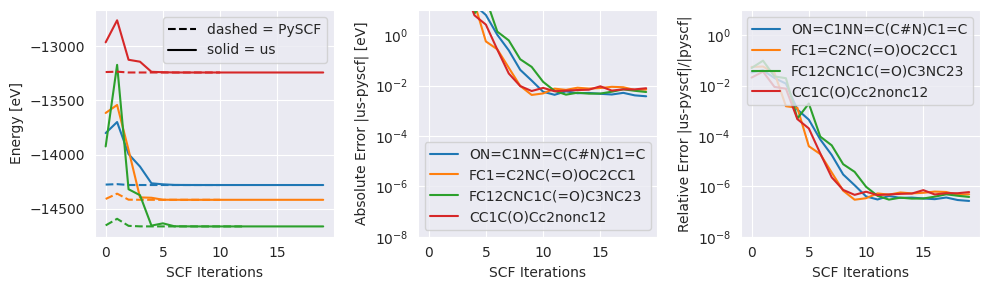

In [137]:
import seaborn as sns 
sns.set_style("darkgrid")
# convergence plot 
# show also for float64 jaxdft cpu

e_us    = pyscf["energies"].apply(lambda x: np.fromstring(x[1:-1], sep=",", dtype=np.float64))
e_pyscf = pyscf["pyscf_energies"].apply(lambda x: np.fromstring(x[1:-1], sep=",", dtype=np.float64))

fig, ax = plt.subplots(1,3, figsize=(10,3))

n = pyscf.shape[0]
for c, i  in enumerate(range(0, n-1, n//4)):
  print(i, n, pyscf.shape)
  smile = pyscf["smile"][i+1:i+2].values[0]
  print(smile, type(smile))
  ax[0].plot(e_us.values[i], "C%i-"%c, label="us")
  ax[0].plot(e_pyscf.values[i], "C%i--"%c, label="pyscf")#%smile)
  ax[0].set_ylabel("Energy [eV]")
  ax[0].set_xlabel("SCF Iterations")

  p = np.array(e_pyscf.values[i])
  p = np.concatenate((p, np.ones(20-p.shape[0])*p[-1]))
  ax[1].plot(np.abs(e_us.values[i] -p), "C%i"%c, label="%s"%smile)
  ax[1].set_yscale("log")
  ax[1].set_xlabel("SCF Iterations")
  ax[1].set_ylabel("Absolute Error |us-pyscf| [eV]")

  ax[2].plot(np.abs(e_us.values[i] -p)/np.abs(p), "C%i"%c, label="%s"%smile)
  ax[2].set_yscale("log")
  ax[2].set_xlabel("SCF Iterations")
  ax[2].set_ylabel("Relative Error |us-pyscf|/|pyscf|")
  ax[1].set_ylim([1e-8, 1e1])
  ax[2].set_ylim([1e-8, 1e1])

ax[1].legend()
ax[2].legend()

l1 = Line2D([], [], color='black', linestyle='dashed', label='dashed = PySCF')
l2 = Line2D([], [], color='black', linestyle='solid', label='solid = us')
ax[0].legend(handles=[l1,l2])

plt.tight_layout()
plt.savefig("figures/skip_minao.jpg")

# pyscf/us_cpu_f64/us_ipu_f32 (do this for one molecule in gdb10)
# seperate plot; talking about initializaiton to save time. 

In [82]:
pyscf["atoms"]

2902          FCCCOCNNNCHHHH
4151          ONCNNCCNCCHHHH
9895          OCCONCNOCCHHHH
12892         FCCNNCNOCCHHHH
14141         OCCOCNNCCCHHHH
                 ...        
207971    NCCCNCCNNOHHHHHHHH
216457    OCCOCCCOCOHHHHHHHH
217892    OCCCNCCCNOHHHHHHHH
230169    NNCOCCCOCOHHHHHHHH
232251    OCCCCNNOCOHHHHHHHH
Name: atoms, Length: 14357, dtype: object

# Benchmark full dft?

C10   

```
tasket -c 0-14
[PySCF full] 0.496968   0.492040        0.509015        0.488038        0.484501        25.0 MB   6250000 (50, 50, 50, 50)
[PySCF s8  ] 0.072172   0.071719        0.072758        0.071742        0.072090        3.2538 MB   813450 (813450,)
[basis set] STO-3G

two epyc AMD 240 cpu cores
..



us: 14M cycles ~ 7.6ms  (~10x)

us mult: 1.2M cycles ~ 0.6ms  (2000x2000 matmul is ~1ms and this is roughly 2500*2500 matrix vector mult;; using amp should make a lot faster!)

basically; we get the 8x reduction in space for slightly slower execution

```

<img src="eri_c10_profile.png" style="width:800px;">

<img src="eri_c10_mult_profile.png" style="width:800px;">

<img src="eri_c10_multerror.png" style="width:800px;">


```
[full v dot] np.max(np.abs( diff )) 6.335019777647943e-07 5.102574859305875e-07 [ipu]
```



c20    tasket -c 0-14 

```
[PySCF full] 7.559561   400.0 MB   100000000 (100, 100, 100, 100)
[PySCF s8  ] 1.025060   51.0151 MB   12753775 (12753775,)
[basis set] STO-3G

us: 
```

us_cycle_count = 163M (? ~ 90ms bow?)

<img src="eri_c20_profile.png" style="width:800px">

Benchmark full DFT thing for gdb10 molecule. 



<img src="dft_gdb10_threads1.png" style="width: 800px">
<img src="dft_gdb10_threads63.png" style="width: 800px">

86M cycles for the entire dft; 47ms. 


benchmakr eigh 




numericla error of xc stuff 








InCacheDFT

MIMD 

SRAM 

data locality advantage of ipu:

mention exchanges / comms small => utilizing parallel IPU tiles neatly. 



![image.png][def]

[def]: attachment:image.png

plot of xc b3lyp implementation comparing ours f32 to pyscf 

# Neural Netwokr Plot


0.0534056834876537
0.0476904772222042
0.1230208277702331


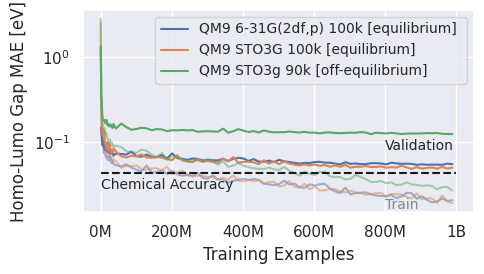

In [185]:
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,1,figsize=(5,2.9))

baseline = {
    "100k QM9, equilibrium, 6-31G(2df,p)": "baseline/fawetp5u.csv",
    "100k QM9, equilibrium, STO-3G": "baseline/03fwkcxf.csv",
    "90k QM9, rdkit, STO-3G (90k)": "baseline/7ytb8jw4.csv",
}

def read_baseline(label, file):
    df = pd.read_csv(f"../petrignn/schnet/wandb_results/{file}")
    columns = ["num_examples", "train_loss", "val_mae"]
    df = df[columns].dropna()

    n = df.shape[0]
    df.index = [label] * n
    df.index.name = "Dataset"

    loss = ["Validation"] * n + ["Training"] * n
    mae = pd.concat([df["val_mae"], df["train_loss"]])
    num = pd.concat([df["num_examples"], df["num_examples"]])
    return pd.DataFrame(
        {"Mean absolute error (eV)": mae, "Loss": loss, "Training Examples": num}
    )

dfs = [read_baseline(k, v) for k, v in baseline.items()]

k = "Mean absolute error (eV)"

names = ["QM9 6-31G(2df,p) 100k [equilibrium]", "QM9 STO3G 100k [equilibrium]", "QM9 STO3g 90k [off-equilibrium]"]

for i, df in enumerate(dfs):  

  train = df[df["Loss"] != "Validation"]
  val   = df[df["Loss"] == "Validation"]
  train_x = train["Training Examples"]
  val_x = val["Training Examples"]
  
  name = names[i]
  plt.plot(val_x, val[k].values, "C%i-"%i, label="%s "%name)
  plt.plot(train_x, train[k].values, "C%i-"%i, alpha=0.5)

  print(val[k].min()) #values[-1])

#plt.plot(dfs[1]["Mean absolute error (eV)"].values)
#plt.plot(dfs[2]["Mean absolute error (eV)"]u.values)
plt.text(0.1, 0.028, "Chemical Accuracy", fontsize="small")

plt.text(8e8, 0.016, "Train", fontsize="small", alpha=0.5)
plt.text(8e8, 0.08, "Validation", fontsize="small")

plt.plot([0, 10**9], [0.043, 0.043], 'k--')
plt.yscale("log")
plt.tight_layout()
#plt.xlim([-0.1, 1e9*1.01])
lst = [0, 200, 400, 600, 800, 1000]
plt.xticks([i*10**6 for i in lst], ["%iM"%i for i in lst][:-1] +["1B"])
plt.ylabel("Homo-Lumo Gap MAE [eV]")
plt.xlabel("Training Examples")
plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig("figures/train_equilibrium.jpg")

Dataset
10k      3988992.0
10k      4870656.0
10k      4107264.0
10k         3584.0
10k      2967552.0
          ...     
10k      7221760.0
10k    301056000.0
10k      1766912.0
10k      5107200.0
10k      3419136.0
Name: Training Examples, Length: 500, dtype: float64
         Mean absolute error (eV)        Loss  Training Examples
Dataset                                                         
10k                      0.459527  Validation          3988992.0
10k                      0.419691  Validation          4870656.0
10k                      0.459527  Validation          4107264.0
10k                      2.447690  Validation             3584.0
10k                      0.459527  Validation          2967552.0
...                           ...         ...                ...
10k                      0.387982  Validation          7221760.0
10k                      0.395259  Validation        301056000.0
10k                      0.544523  Validation          1766912.0
10k            

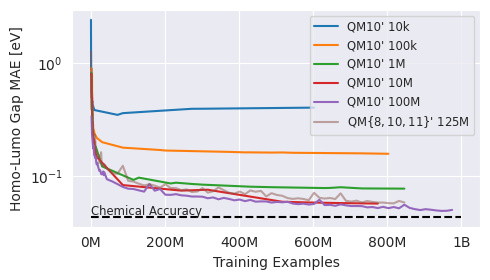

In [12]:
baseline = {
    "10k": "oc-gdb100m/zlzpgh0p.csv",
    "100k": "oc-gdb100m/c6bdxy28.csv",
    "1m": "oc-gdb100m/241h1dhz.csv",
    "10m": "oc-gdb100m/t8d17u6n.csv",
    "100m": "oc-gdb100m/2yv8z187.csv",  
    # "100m (b)": "oc-gdb100m/una3w3dp.csv",
    "120m": "oc-gdb100m/hwopufbj.csv",
}

dfs = [read_baseline(k, v) for k, v in baseline.items()]
df = pd.concat(dfs)
df.head()

import numpy as np 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,1,figsize=(5,2.9))

k = "Mean absolute error (eV)"

names = ["QM10' 10k", "QM10' 100k", "QM10' 1M", "QM10' 10M", "QM10' 100M", "QM$\\{8,10,11\\}$' 125M"]

for i, df in enumerate(dfs):  

  train = df[df["Loss"] != "Validation"]
  val   = df[df["Loss"] == "Validation"]
  train_x = train["Training Examples"]
  val_x = val["Training Examples"]

  print(val_x)
  print(val)

  
  
  #plt.plot(val_x, val[k].values, "C%i-"%i)
  indxs = np.argsort(val_x.values)
  if i == 5: plt.plot(val_x.values[indxs], val[k].values[indxs], "C%i-"%i, label=names[i], alpha=0.5)
  else: plt.plot(val_x.values[indxs], val[k].values[indxs], "C%i-"%i, label=names[i])
  #plt.plot(train_x, train[k].values, "C%i-"%i, alpha=0.5)

#plt.plot(dfs[1]["Mean absolute error (eV)"].values)
#plt.plot(dfs[2]["Mean absolute error (eV)"]u.values)
plt.text(0.1, 0.045, "Chemical Accuracy", fontsize="small")

plt.plot([0, 10**9], [0.043, 0.043], 'k--')
plt.yscale("log")
plt.tight_layout()
#plt.xlim([-0.1, 1e9*1.01])
lst = [0, 200, 400, 600, 800, 1000]
plt.xticks([i*10**6 for i in lst], ["%iM"%i for i in lst][:-1] +["1B"])
plt.ylabel("Homo-Lumo Gap MAE [eV]")
plt.xlabel("Training Examples")
plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig("figures/train_data.jpg")

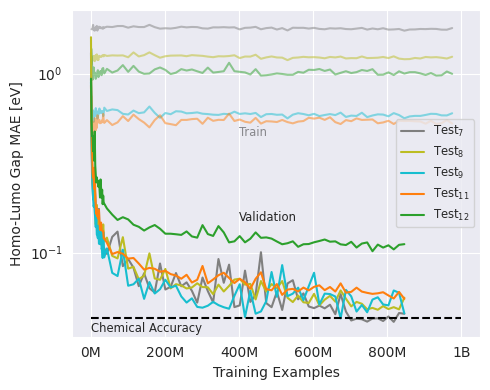

In [23]:
def read_additional(label, file):
    df = pd.read_csv(f"../petrignn/schnet/wandb_results/{file}")
    return df

dfs = [read_additional(k, v) for k, v in baseline.items()]

import numpy as np 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,1,figsize=(5,4))

k = "Mean absolute error (eV)"

names = ["Train$_{10}$ Val", "Train$_{8,10,11}$ Val"]

for i, (df, name) in enumerate(zip(dfs[-2:], names)):  
  val   = df
  val_x = val["num_examples"]


  #plt.plot(val_x, val[k].values, "C%i-"%i)
  for j in range(7,13):
    if j == 10: continue
    val_y = val["gdb%i"%j]
    if i == 0: plt.plot(val_x, val_y, "C%i"%j, alpha=0.5) 
    else: plt.plot(val_x, val_y, "C%i"%j, label="Test$_{%i}$"%j)
  #plt.plot(train_x, train[k].values, "C%i-"%i, alpha=0.5)

plt.text(0.1, 0.036, "Chemical Accuracy", fontsize="small")

plt.text(4e8, 0.450, "Train",      fontsize="small", alpha=0.5)
plt.text(4e8, 0.15,  "Validation", fontsize="small")

plt.plot([0, 10**9], [0.043, 0.043], 'k--')
plt.yscale("log")
plt.tight_layout()
#plt.xlim([-0.1, 1e9*1.01])
lst = [0, 200, 400, 600, 800, 1000]
plt.xticks([i*10**6 for i in lst], ["%iM"%i for i in lst][:-1] +["1B"])
plt.ylabel("Homo-Lumo Gap MAE [eV]")
plt.xlabel("Training Examples")
plt.tight_layout()
plt.legend(fontsize="small")#,  bbox_to_anchor=(0.1, 1.), ncol=5)
plt.savefig("figures/train_data.jpg")

# merge into one plot 

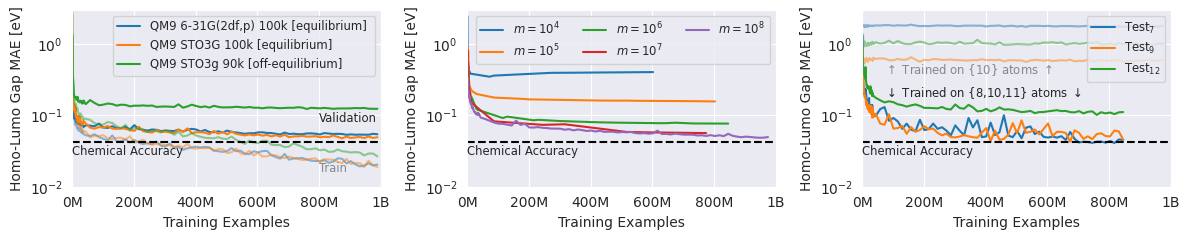

In [2]:
import pandas as pd 
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt 
#fig, ax = plt.subplots(1,3,figsize=(12,3))
fig, ax = plt.subplots(1,3,figsize=(12,2.5))

baseline = {
    "100k QM9, equilibrium, 6-31G(2df,p)": "baseline/fawetp5u.csv",
    "100k QM9, equilibrium, STO-3G": "baseline/03fwkcxf.csv",
    "90k QM9, rdkit, STO-3G (90k)": "baseline/7ytb8jw4.csv",
}

def read_baseline(label, file):
    df = pd.read_csv(f"../petrignn/schnet/wandb_results/{file}")
    columns = ["num_examples", "train_loss", "val_mae"]
    df = df[columns].dropna()

    n = df.shape[0]
    df.index = [label] * n
    df.index.name = "Dataset"

    loss = ["Validation"] * n + ["Training"] * n
    mae = pd.concat([df["val_mae"], df["train_loss"]])
    num = pd.concat([df["num_examples"], df["num_examples"]])
    return pd.DataFrame(
        {"Mean absolute error (eV)": mae, "Loss": loss, "Training Examples": num}
    )

dfs = [read_baseline(k, v) for k, v in baseline.items()]

k = "Mean absolute error (eV)"

names = ["QM9 6-31G(2df,p) 100k [equilibrium]", "QM9 STO3G 100k [equilibrium]", "QM9 STO3g 90k [off-equilibrium]"]

for i, df in enumerate(dfs):  

  train = df[df["Loss"] != "Validation"]
  val   = df[df["Loss"] == "Validation"]
  train_x = train["Training Examples"]
  val_x = val["Training Examples"]
  
  name = names[i]
  ax[0].plot(val_x, val[k].values, "C%i-"%i, label="%s "%name)
  ax[0].plot(train_x, train[k].values, "C%i-"%i, alpha=0.5)

#plt.plot(dfs[1]["Mean absolute error (eV)"].values)
#plt.plot(dfs[2]["Mean absolute error (eV)"]u.values)
ax[0].text(0.1, 0.028, "Chemical Accuracy", fontsize="small")
ax[1].text(0.1, 0.028, "Chemical Accuracy", fontsize="small")
ax[2].text(0.1, 0.028, "Chemical Accuracy", fontsize="small")

ax[0].text(8e8, 0.016, "Train", fontsize="small", alpha=0.5)
ax[0].text(8e8, 0.08, "Validation", fontsize="small")

ax[0].plot([0, 10**9], [0.043, 0.043], 'k--')
ax[0].set_yscale("log")
#plt.tight_layout()
#plt.xlim([-0.1, 1e9*1.01])
lst = [0, 200, 400, 600, 800, 1000]
ax[0].set_xticks([i*10**6 for i in lst], ["%iM"%i for i in lst][:-1] +["1B"])
ax[0].set_ylabel("Homo-Lumo Gap MAE [eV]")
ax[0].set_xlabel("Training Examples")
ax[0].legend(fontsize="small")
#plt.tight_layout()


baseline = {
    "10k": "oc-gdb100m/zlzpgh0p.csv",
    "100k": "oc-gdb100m/c6bdxy28.csv",
    "1m": "oc-gdb100m/241h1dhz.csv",
    "10m": "oc-gdb100m/t8d17u6n.csv",
    "100m": "oc-gdb100m/2yv8z187.csv",  
    # "100m (b)": "oc-gdb100m/una3w3dp.csv",
    "120m": "oc-gdb100m/hwopufbj.csv",
}

dfs = [read_baseline(k, v) for k, v in baseline.items()]
df = pd.concat(dfs)
df.head()

import numpy as np 
import matplotlib.pyplot as plt 

k = "Mean absolute error (eV)"

#names = ["QM10' 10k", "QM10' 100k", "QM10' 1M", "QM10' 10M", "QM10' 100M", "QM$\\{8,10,11\\}$' 125M"]
names = ["$m=10^%i$"%i for i in range(4,9)] #+ ["$\\dagger$"]

for i, df in enumerate(dfs[:-1]):  

  train = df[df["Loss"] != "Validation"]
  val   = df[df["Loss"] == "Validation"]
  train_x = train["Training Examples"]
  val_x = val["Training Examples"]


  
  
  #plt.plot(val_x, val[k].values, "C%i-"%i)
  indxs = np.argsort(val_x.values)
  if i == 5: ax[1].plot(val_x.values[indxs], val[k].values[indxs], "C%i-"%i, label=names[i], alpha=0.5)
  else: ax[1].plot(val_x.values[indxs], val[k].values[indxs], "C%i-"%i, label=names[i])
  #ax[1].plot(train_x, train[k].values, "C%i-"%i, alpha=0.5)

#ax[1].plot(dfs[1]["Mean absolute error (eV)"].values)
#ax[1].plot(dfs[2]["Mean absolute error (eV)"]u.values)
#ax[1].text(0.1, 0.045, "Chemical Accuracy", fontsize="small")

ax[1].plot([0, 10**9], [0.043, 0.043], 'k--')
ax[1].set_yscale("log")
#plt.xlim([-0.1, 1e9*1.01])
lst = [0, 200, 400, 600, 800, 1000]
ax[1].set_xticks([i*10**6 for i in lst], ["%iM"%i for i in lst][:-1] +["1B"])
ax[1].set_ylabel("Homo-Lumo Gap MAE [eV]")
ax[1].set_xlabel("Training Examples")
ax[1].legend(fontsize="small", ncol=3, loc=1)




def read_additional(label, file):
    df = pd.read_csv(f"../petrignn/schnet/wandb_results/{file}")
    return df

dfs = [read_additional(k, v) for k, v in baseline.items()]

import numpy as np 
import matplotlib.pyplot as plt 

k = "Mean absolute error (eV)"

names = ["Train$_{10}$ Val", "Train$_{8,10,11}$ Val"]

for i, (df, name) in enumerate(zip(dfs[-2:], names)):  
  val   = df
  val_x = val["num_examples"]


  #plt.plot(val_x, val[k].values, "C%i-"%i)
  for c, j in enumerate([7,9,12]): #range(7,13):
    if j == 10: continue
    val_y = val["gdb%i"%j]
    if i == 0: ax[2].plot(val_x, val_y, "C%i"%c, alpha=0.5) 
    else: ax[2].plot(val_x, val_y, "C%i"%c, label="Test$_{%i}$"%j)
  #ax[2].plot(train_x, train[k].values, "C%i-"%i, alpha=0.5)

#ax[2].text(0.1, 0.036, "Chemical Accuracy", fontsize="small")

ax[2].text(7e7, 0.380, "$\\uparrow$ Trained on {10} atoms $\\uparrow$",      fontsize="small", alpha=0.5)
ax[2].text(7e7, 0.18,  "$\\downarrow$ Trained on {8,10,11} atoms $\\downarrow$", fontsize="small")

ax[2].plot([0, 10**9], [0.043, 0.043], 'k--')
ax[2].set_yscale("log")
#plt.xlim([-0.1, 1e9*1.01])
lst = [0, 200, 400, 600, 800, 1000]
ax[2].set_xticks([i*10**6 for i in lst], ["%iM"%i for i in lst][:-1] +["1B"])
ax[2].set_ylabel("Homo-Lumo Gap MAE [eV]")
ax[2].set_xlabel("Training Examples")
ax[2].legend(fontsize="small", loc=1)#,  bbox_to_anchor=(0.1, 1.), ncol=5)

for a in ax: 
   a.set_ylim([1e-2, 3])
   a.set_xlim([0, 10**9])

plt.tight_layout()
plt.savefig("figures/alltrainplots.jpg")

#plt.savefig("figures/train_equilibrium.jpg")

# atomic orbitals in fda and pcq 



In [4]:
import pandas as pd 
pcq = pd.read_pickle("pcq.pkl")

In [10]:
#pcq["num_atoms"] - pcq["num_hs"]
pcq["atom_string"][-100:].apply(lambda x: len(x.replace("H", "")))

2034915    20
2380762    20
2830674    20
1492957    20
1282448    20
           ..
1491627    20
1491562    20
1491526    20
1491510    20
1304352    20
Name: atom_string, Length: 100, dtype: int64

In [42]:
pcq.shape

(3378606, 11)

In [95]:
lens = pcq["atom_string"].apply(lambda x: len(x.replace("H", "")))

In [99]:
pcq["lens"] = lens
sorted = pcq.sort_values("lens")

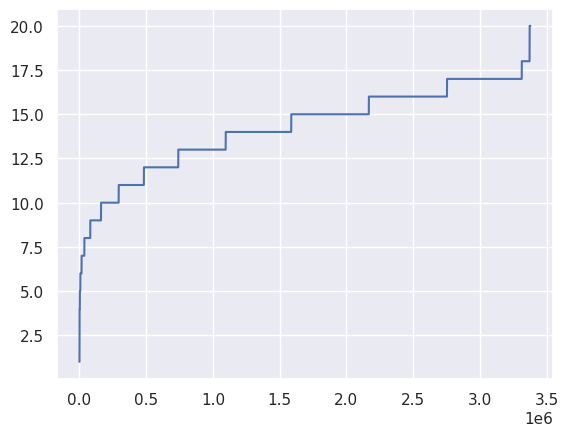

In [100]:
# do one for each number of atoms? 
plt.plot(sorted["lens"].values)

In [106]:
def get_atom_string(atoms, locs):
    atom_string = atoms 
    atoms = re.findall('[a-zA-Z][^A-Z]*', atoms)
    str = ""
    for atom, loc in zip(atoms, locs): 
      str += "%s %4f %4f %4f; "%((atom,) + tuple(loc) )
    return atom_string, str 


from tqdm.notebook import tqdm 

pcq_sto3g = []
pcq_631g = []
pcq_631gs = []

eri_sto3g = []
eri_631g = []
eri_631gs = []

xs = []

for i in tqdm(range(5, 21)): # num atoms

  _pcq = sorted[sorted["lens"] == i]

  atoms = _pcq[-1:]["atom_string"].values[0]
  locs = _pcq[-1:]["atom_locations"].values[0]
  #print(atoms, locs)

  _, str = get_atom_string(atoms, locs)

  xs.append(i) 

  # get some conformer 
  mol = gto.Mole(unit="Angstrom") # 25% zero in borh and 75% zero in angstrom? =OOO
  mol.build(
  atom = str,
  basis = 'sto-3g')
  pcq_sto3g.append(mol.nao_nr())
  eri_sto3g.append(  mol.intor("int2e_sph", aosym="s8") )
  #print(mol.nao_nr())
  #eri = mol.intor("int2e_sph", aosym="s8")
  #print(eri.shape)
  #print(np.sum(np.abs(eri)<1e-10) / eri.size)

  mol = gto.Mole(unit="Angstrom")
  mol.build(
  atom = str,
  basis = '631g')
  #print(mol.nao_nr())
  #eri = mol.intor("int2e_sph", aosym="s8")
  #print(np.sum(np.abs(eri)<1e-10) / eri.size)
  pcq_631g.append(mol.nao_nr())
  eri_631g.append(  mol.intor("int2e_sph", aosym="s8") )

  mol = gto.Mole(unit="Angstrom")
  mol.build(
  atom = str,
  basis = '631g*')
  #print(mol.nao_nr())
  pcq_631gs.append(mol.nao_nr())
  eri_631gs.append(  mol.intor("int2e_sph", aosym="s8") )

  #eri = mol.intor("int2e_sph", aosym="s8")
  #print(np.sum(np.abs(eri)<1e-10) / eri.size)

Exception ignored in: <function tqdm.__del__ at 0x7f1db8dc4820>
Traceback (most recent call last):
  File "/nethome/alexm/.local/lib/python3.8/site-packages/tqdm/std.py", line 1145, in __del__
    self.close()
  File "/nethome/alexm/.local/lib/python3.8/site-packages/tqdm/std.py", line 1274, in close
    if self.last_print_t < self.start_t + self.delay:
AttributeError: 'tqdm' object has no attribute 'last_print_t'
100%|██████████| 16/16 [00:22<00:00,  1.44s/it]


In [107]:
a = [np.sum(np.abs(b)<1e-10) / b.size for b in eri_sto3g]
print(a)

sparse_sto3g = [100*np.sum(np.abs(b)<1e-10) / b.size for b in tqdm(eri_sto3g)]
print(sparse_sto3g)
sparse_631g = [100*np.sum(np.abs(b)<1e-10) / b.size for b in tqdm(eri_631g)]
print(sparse_631g)
sparse_631gs = [100*np.sum(np.abs(b)<1e-10) / b.size for b in tqdm(eri_631gs)]
print(sparse_631gs)

[0.03647528244555668, 0.04275507564981249, 0.03850237936052228, 0.13600798941486805, 0.2368576437541955, 0.08863620763236668, 0.24699695150873083, 0.3908660167329279, 0.2612550496005674, 0.42926114717380726, 0.5211180527640213, 0.44668800711620343, 0.5703137296506647, 0.7214041483412801, 0.522931975029725, 0.7537609723303458]


100%|██████████| 16/16 [00:00<00:00, 61.75it/s] 


[3.6475282445556676, 4.2755075649812495, 3.850237936052228, 13.600798941486806, 23.68576437541955, 8.863620763236668, 24.699695150873083, 39.0866016732928, 26.125504960056738, 42.92611471738073, 52.11180527640214, 44.66880071162034, 57.031372965066474, 72.14041483412801, 52.293197502972504, 75.37609723303457]


100%|██████████| 16/16 [00:03<00:00,  5.13it/s]


[6.994632413692097, 5.700662288219784, 8.9965036953665, 22.6108364781638, 32.911818848771865, 14.847607635029842, 33.664202124604486, 44.0888072784764, 31.518187937487546, 47.25643188921046, 55.21253792693605, 50.091624669877916, 60.28706143219984, 73.4672937423118, 54.69883523016723, 77.17312140135628]


100%|██████████| 16/16 [00:13<00:00,  1.15it/s]

[8.26143799814013, 4.763204839756483, 9.471845320275914, 28.95797120677623, 40.07050503103494, 17.565501646461808, 40.59869457904106, 50.48067185164906, 39.79141345533758, 55.733517639859905, 61.58277488281388, 57.727870164897105, 66.82064383973632, 77.3668672342379, 63.369225738725014, 81.21267879907352]


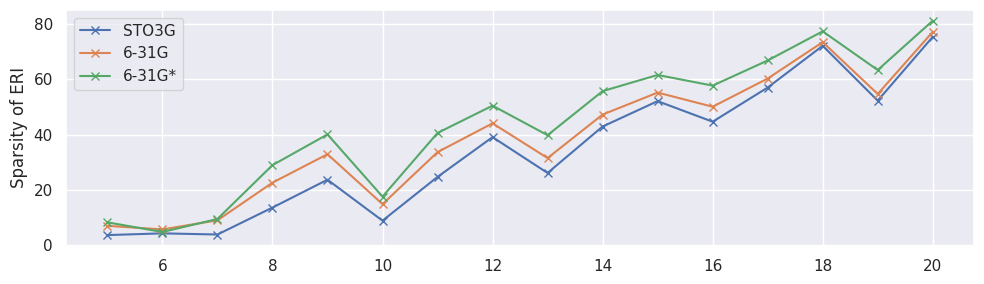

In [138]:
fig, ax = plt.subplots(1,1, figsize=(10, 3))
plt.plot(xs, sparse_sto3g,'-x', label="STO3G")
plt.plot(xs, sparse_631g, '-x', label="6-31G")
plt.plot(xs, sparse_631gs, '-x', label="6-31G*")
plt.ylabel("Number Heavy Atoms")
plt.ylabel("Sparsity of ERI")
plt.legend()
plt.tight_layout()
plt.savefig("figures/pcq_sparsity_atoms.jpg")
 

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [33, 37, 46, 55, 65, 60, 71, 72, 73, 83, 87, 99, 103, 105, 107, 126]


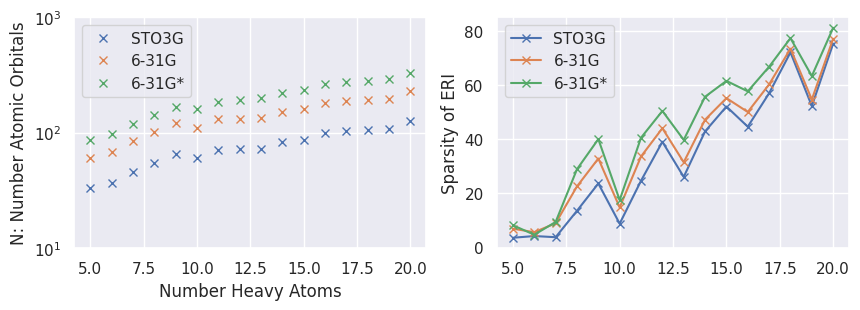

In [108]:
fig, ax = plt.subplots(1,2, figsize=(10, 3))

print(xs, pcq_sto3g)

ax[0].plot(xs, pcq_sto3g, 'x', label="STO3G")
ax[0].plot(xs, pcq_631g, 'x', label="6-31G")
ax[0].plot(xs, pcq_631gs, 'x', label="6-31G*")
ax[0].set_xlabel("Number Heavy Atoms")
ax[0].set_ylabel("N: Number Atomic Orbitals")
ax[0].set_yscale("log")
ax[0].set_yticks([10, 100, 1000])
ax[0].legend()


ax[1].plot(xs, sparse_sto3g,'-x', label="STO3G")
ax[1].plot(xs, sparse_631g, '-x', label="6-31G")
ax[1].plot(xs, sparse_631gs, '-x', label="6-31G*")
ax[1].set_ylabel("Number Heavy Atoms")
ax[1].set_ylabel("Sparsity of ERI")
ax[1].legend()
 

In [11]:
!wget https://chemoinfo.ipmc.cnrs.fr/TMP/tmp.15784/e-Drug3D_2056.sdf

--2023-05-21 11:00:06--  https://chemoinfo.ipmc.cnrs.fr/TMP/tmp.15784/e-Drug3D_2056.sdf
Resolving chemoinfo.ipmc.cnrs.fr (chemoinfo.ipmc.cnrs.fr)... 134.59.171.248
Connecting to chemoinfo.ipmc.cnrs.fr (chemoinfo.ipmc.cnrs.fr)|134.59.171.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10002216 (9.5M) [chemical/x-mdl-sdfile]
Saving to: ‘e-Drug3D_2056.sdf’

e-Drug3D_2056.sdf   100%[===================>]   9.54M  37.9MB/s    in 0.3s    

2023-05-21 11:00:06 (37.9 MB/s) - ‘e-Drug3D_2056.sdf’ saved [10002216/10002216]



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem

sns.set_theme()

supplier = Chem.SDMolSupplier("e-Drug3D_2056.sdf", removeHs=False)
len(supplier)

2056

In [111]:
from tqdm.notebook import tqdm 
import re 
import pyscf 
from pyscf import gto
skipped_ids = []
num_atoms = []
num_heavy_atoms = []
sto3g = []
_631g = []
_631gs = []

def get_atom_string(atoms, locs):
    atom_string = atoms 
    atoms = re.findall('[a-zA-Z][^A-Z]*', atoms)
    str = ""
    for atom, loc in zip(atoms, locs): 
      str += "%s %4f %4f %4f; "%((atom,) + tuple(loc) )
    return atom_string, str 

compute_pyscf_N = True # a lot slower...
natoms = []

for i in tqdm(range(len(supplier))):
    mol = supplier[i]
    if mol is None:
        skipped_ids.append(i)
        continue

    num_atoms.append(mol.GetNumAtoms())
    heavyz= [at.GetAtomicNum() for at in mol.GetAtoms() if at.GetAtomicNum() > 1]
    num_heavy_atoms.append(len(heavyz))

    if compute_pyscf_N: 
        try: 
            locs = mol.GetConformer().GetPositions()
            atoms = "".join([at.GetSymbol() for at in mol.GetAtoms()])
            atom_string, str = get_atom_string(atoms, locs)

            # get some conformer 
            mol = gto.Mole()
            mol.build(
            atom = str,
            basis = 'sto-3g')
            sto3g.append(mol.nao_nr())

            mol = gto.Mole()
            mol.build(
            atom = str,
            basis = '631g')
            _631g.append(mol.nao_nr())

            mol = gto.Mole()
            mol.build(
            atom = str,
            basis = '631g*')
            _631gs.append(mol.nao_nr())

            natoms.append(len(heavyz))

        except:
            pass 
    
# add pcq, qm9, qm7, ... to plot aswell. 

num_atoms = np.array(num_atoms)
num_heavy_atoms = np.array(num_heavy_atoms)
print(f"Skipped a total of {len(skipped_ids)} molecules\nindices={skipped_ids}")

  0%|          | 0/2056 [00:00<?, ?it/s]

[14:42:26] Explicit valence for atom # 4 N, 4, is greater than permitted
[14:42:26] ERROR: Could not sanitize molecule ending on line 514618
[14:42:26] ERROR: Explicit valence for atom # 4 N, 4, is greater than permitted
[14:43:25] Explicit valence for atom # 8 N, 4, is greater than permitted
[14:43:25] ERROR: Could not sanitize molecule ending on line 523897
[14:43:25] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
[14:44:29] Explicit valence for atom # 7 N, 4, is greater than permitted
[14:44:29] ERROR: Could not sanitize molecule ending on line 535856
[14:44:29] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[14:44:54] Explicit valence for atom # 8 N, 4, is greater than permitted
[14:44:54] ERROR: Could not sanitize molecule ending on line 539870
[14:44:54] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
[14:44:54] Explicit valence for atom # 6 N, 4, is greater than permitted
[14:44:54] ERROR: Could not sanitize molecu

Skipped a total of 24 molecules
indices=[28, 124, 230, 270, 271, 301, 371, 428, 473, 483, 509, 514, 518, 536, 555, 602, 689, 785, 802, 870, 909, 920, 973, 1169]


In [131]:
len(natoms), len(num_heavy_atoms), len(sto3g)

(1647, 2032, 1674)

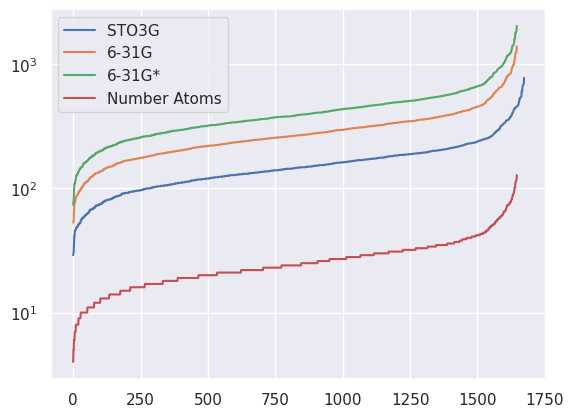

In [123]:
plt.plot(np.sort(sto3g), label="STO3G")
plt.plot(np.sort(_631g), label="6-31G")
plt.plot(np.sort(_631gs), label="6-31G*")

plt.plot(np.sort(natoms), label="Number Atoms")
plt.yscale("log")
plt.legend()



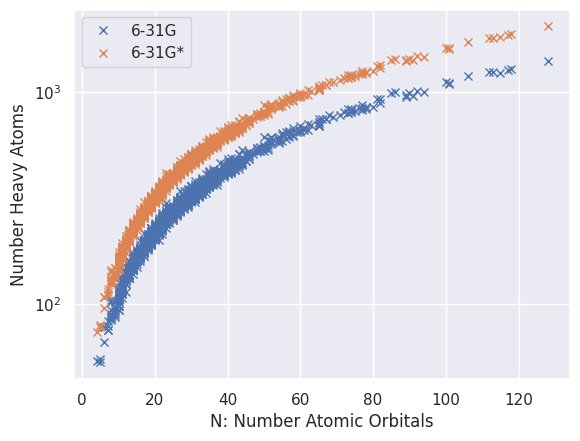

In [133]:
#plt.plot(natoms, sto3g[-len(natoms):], 'x', label="STO3G")
plt.plot(natoms, _631g,'x', label="6-31G")
plt.plot(natoms, _631gs, 'x', label="6-31G*")
plt.yscale("log")
plt.ylabel("Number Heavy Atoms")
plt.xlabel("N: Number Atomic Orbitals")
plt.legend()

In [173]:
len(_631gs), len(supplier)

(1647, 2056)

0.6639105058365758


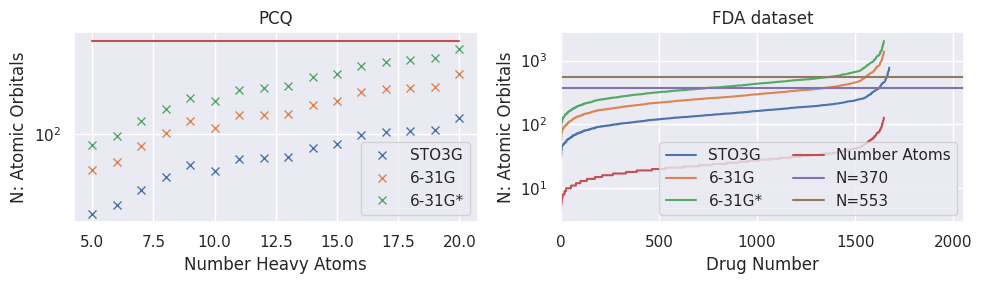

In [171]:
fig, ax = plt.subplots(1,2, figsize=(10, 3))

ax[0].plot(xs, pcq_sto3g, 'x', label="STO3G")
ax[0].plot(xs, pcq_631g,  'x', label="6-31G")
ax[0].plot(xs, pcq_631gs, 'x', label="6-31G*")
ax[0].set_xlabel("Number Heavy Atoms")
ax[0].set_ylabel("N: Atomic Orbitals")
ax[0].set_yscale("log")
ax[0].set_yticks([10, 100, 1000])
ax[0].legend()
ax[0].set_title("PCQ")
ax[0].plot([5, 20],[370, 370], label="N=370")

ax[1].set_title("FDA dataset")
ax[1].plot(np.sort(sto3g), label="STO3G")
ax[1].plot(np.sort(_631g), label="6-31G")
ax[1].plot(np.sort(_631gs), label="6-31G*")
ax[1].plot(np.sort(natoms), label="Number Atoms")
ax[1].set_yscale("log")
ax[1].plot([5, len(supplier)],[370, 370], label="N=370")
ax[1].plot([5, len(supplier)],[553, 553], label="N=553")
ax[1].set_xlabel("Drug Number")
ax[1].set_ylabel("N: Atomic Orbitals")
ax[1].set_xlim([0, len(supplier)])

print(np.sum(np.array(_631gs)<553)/len(supplier))

ax[1].legend(ncol=2)
plt.tight_layout()
plt.savefig("figures/fda.jpg")


In [ ]:
from tqdm.notebook import tqdm 
import re 
import pyscf 
from pyscf import gto
skipped_ids = []
num_atoms = []
num_heavy_atoms = []
sto3g = []
_631g = []
_631gs = []

def get_atom_string(atoms, locs):
    atom_string = atoms 
    atoms = re.findall('[a-zA-Z][^A-Z]*', atoms)
    str = ""
    for atom, loc in zip(atoms, locs): 
      str += "%s %4f %4f %4f; "%((atom,) + tuple(loc) )
    return atom_string, str 

compute_pyscf_N = True # a lot slower...
natoms = []

for i in tqdm(range(len(supplier))):
    mol = supplier[i]
    if mol is None:
        skipped_ids.append(i)
        continue

    num_atoms.append(mol.GetNumAtoms())
    heavyz= [at.GetAtomicNum() for at in mol.GetAtoms() if at.GetAtomicNum() > 1]
    num_heavy_atoms.append(len(heavyz))

    if compute_pyscf_N: 
        try: 
            locs = mol.GetConformer().GetPositions()
            atoms = "".join([at.GetSymbol() for at in mol.GetAtoms()])
            atom_string, str = get_atom_string(atoms, locs)

            # get some conformer 
            mol = gto.Mole()
            mol.build(
            atom = str,
            basis = 'sto-3g')
            sto3g.append(mol.nao_nr())

            mol = gto.Mole()
            mol.build(
            atom = str,
            basis = '631g')
            _631g.append(mol.nao_nr())

            mol = gto.Mole()
            mol.build(
            atom = str,
            basis = '631g*')
            _631gs.append(mol.nao_nr())

            natoms.append(len(heavyz))

        except:
            pass 
    
# add pcq, qm9, qm7, ... to plot aswell. 

num_atoms = np.array(num_atoms)
num_heavy_atoms = np.array(num_heavy_atoms)
print(f"Skipped a total of {len(skipped_ids)} molecules\nindices={skipped_ids}")